<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li><li><span><a href="#Some-notes" data-toc-modified-id="Some-notes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Some notes</a></span><ul class="toc-item"><li><span><a href="#Cost-functions" data-toc-modified-id="Cost-functions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cost functions</a></span></li></ul></li><li><span><a href="#Load" data-toc-modified-id="Load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Viz-costs" data-toc-modified-id="Viz-costs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Viz costs</a></span></li><li><span><a href="#Solving-just-one-instance-to-check-if-it-works-properly" data-toc-modified-id="Solving-just-one-instance-to-check-if-it-works-properly-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Solving just one instance to check if it works properly</a></span></li><li><span><a href="#Studying-the-&quot;pathological-case&quot;,-when-there-is-no-correction." data-toc-modified-id="Studying-the-&quot;pathological-case&quot;,-when-there-is-no-correction.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Studying the "pathological case", when there is no correction.</a></span></li><li><span><a href="#Sampling-solutions" data-toc-modified-id="Sampling-solutions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Sampling solutions</a></span><ul class="toc-item"><li><span><a href="#Original-graph-without-correction" data-toc-modified-id="Original-graph-without-correction-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Original graph without correction</a></span></li></ul></li><li><span><a href="#Run-complete-algorithm" data-toc-modified-id="Run-complete-algorithm-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Run complete algorithm</a></span></li></ul></li><li><span><a href="#Studying-the-case-that-seems-non-expansive" data-toc-modified-id="Studying-the-case-that-seems-non-expansive-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Studying the case that seems non-expansive</a></span></li><li><span><a href="#What-if-it-is-a-question-of-&quot;too-steep&quot;-cost-functions?" data-toc-modified-id="What-if-it-is-a-question-of-&quot;too-steep&quot;-cost-functions?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>What if it is a question of "too steep" cost functions?</a></span><ul class="toc-item"><li><span><a href="#Viz-costs" data-toc-modified-id="Viz-costs-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Viz costs</a></span></li><li><span><a href="#Solving-just-one-instance-to-check-if-it-works-properly" data-toc-modified-id="Solving-just-one-instance-to-check-if-it-works-properly-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Solving just one instance to check if it works properly</a></span></li><li><span><a href="#Sample-solutions" data-toc-modified-id="Sample-solutions-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Sample solutions</a></span></li><li><span><a href="#Studying-a-case-with-rat-&gt;1" data-toc-modified-id="Studying-a-case-with-rat->1-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Studying a case with rat &gt;1</a></span></li></ul></li></ul></div>

In [1]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', size = 12)
rc('xtick', labelsize = 12)
rc('ytick', labelsize = 12)
rc('figure', figsize = (8, 4))

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from amod_ed.contractivity_v3 import viz_costs, _construct_problem
from amod_ed.contractivity_v3 import sample_solutions, run_algorithm
import cvxpy as cp
import networkx as nx

import pandas as pd

from amod_ed.contractivity_v3 import plot_results_run, compute_error_KKT, get_d_values

from amod_ed.contractivity_v3 import get_new_r, get_edge_flow, get_flow_edge_od

# Description

This notebook implements a more general framework, to be essentially tested on a 3-node case. 

TODO: 
- Check for failures
- Test with different scenarios (i.e. parameters of the network)

## Notes

**We see there are still order 10-2 errors on the KKT with GUROBI**

**We also see the values are less accurate with ECOS -- hence the optimal inaccurate**

# Some notes

## Cost functions

In the different functions of the code, the cost functions and inverse demand functions are defined based on BPR functions (out of simplicity). 

We take the following notation: 

$$
BPR(x,\kappa, \phi) = \phi(1+\alpha (x/\kappa)^\beta),
$$
where $\alpha$ and $\beta$ are parameters. 

The edge costs are actually BPR functions. As for the inverse demand functions, we define them as
$$
D^{-1} = - BPR() + S,
$$
where $S\in\mathbb{R}^+$ is the inverse demand shift, ensuring that $D^{-1}$ is larger than zero over a given subset of $\mathbb{R}^+$.

# Load

The characteristics of the graph are loaded from Excel files. 

In [3]:
edges = pd.read_excel('cost_edges_3.xlsx')
inv_edges = pd.read_excel('inv_demand_3.xlsx')

In [4]:
edges

,origin,destination,phi,k
0,1,2,1,3
1,2,1,1,3
2,1,3,1,3
3,3,1,1,3
4,2,3,1,3
5,3,2,1,3


In [5]:
inv_edges

,origin,destination,phi,k,shift
0,1,2,1,4,10
1,2,1,3,3,60
2,3,1,2,3,40
3,1,3,4,4,50
4,2,3,1,5,10
5,3,2,3,3,55


## Viz costs

Visualize the costs for each OD pair specified in the Excels. 

In [212]:
# inv_edges['shift'] = inv_edges['shift']+15

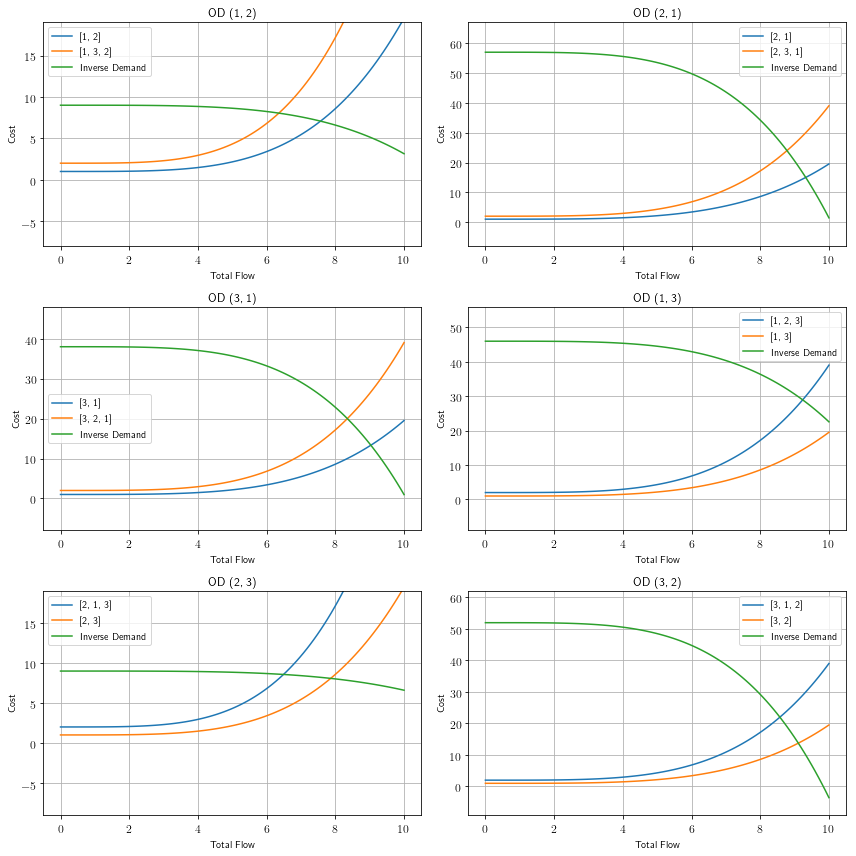

In [97]:
viz_costs(edges, inv_edges, name = 'costs1', save = False, correct = False, beta = 4)

## Solving just one instance to check if it works properly

The below builds the optimization problem. 

In [6]:
correct = False

In [7]:
"""
Returns
-------
f_p: cvxpy.Variable
    The flow for each commodity on each edge
f_r: cvxpy.Variable
    The rebalancing flow on each edge
r: cvxpy.Parameter
    The rebalancing guess for each node
d_var: cvxpy.Variable
    The demand for each each
prob: cvxpy.Problem
    The optimization problem
map_comps: dict
    A map linking components of f_p to the edges and inv edges
map_edges: dict
    A map linking edges to components of f_p
costs_dict: dict
    Dict containing the cost for each edge
inv_demand_dict: dict
    The inverse demand cost for each od pair
G: nx.DiGraph
    Graph representing the network
nodes: list
    list of nodes
"""
f_p, f_r, r, d_var, prob, map_comps, map_edges,\
 costs_dict, inv_d_dict, G, nodes = _construct_problem(edges, inv_edges, correct = correct)

Specify a value of the rebalancing parameter

In [8]:
r_new = [0, 0, 0]
r.value = r_new

You can then solve the problem. 

In [9]:
prob.solve(solver = cp.GUROBI)

Academic license - for non-commercial use only


-1524.9490241835592

Check the status. 

In [10]:
prob.status

'optimal'

Therefore, the below function helps in analyzing and decomposing edge by edge for the passenger flow. 

In [11]:
get_edge_flow(f_p, map_edges)

{(1, 2): 7.788651666448043,
 (1, 3): 9.529191786909362,
 (2, 1): 9.324602766950827,
 (2, 3): 7.967044960513021,
 (3, 1): 9.033764471166844,
 (3, 2): 9.109104234626699}

In [12]:
get_d_values(inv_edges, d_var)

{(1, 2): 6.705944117578389,
 (2, 1): 9.324602762302863,
 (3, 1): 9.033764430118863,
 (1, 3): 10.611899283685263,
 (2, 3): 6.884337411012822,
 (3, 2): 9.109104227193125}

In [337]:
get_flow_edge_od(map_comps, f_p)

{(1, 2): {(1, 2): 6.705944111106491,
  (2, 1): 1.8111672206240742e-08,
  (3, 1): -0.0,
  (1, 3): 1.0827075182642112,
  (2, 3): -0.0,
  (3, 2): 1.8965668919239885e-08},
 (1, 3): {(1, 2): 6.471898806728983e-09,
  (2, 1): -0.0,
  (3, 1): -0.0,
  (1, 3): 9.529191765421052,
  (2, 3): 6.292290870736073e-09,
  (3, 2): 8.724120335839568e-09},
 (2, 1): {(1, 2): 9.64028370339304e-09,
  (2, 1): 9.324602741604814,
  (3, 1): 9.413439599003632e-09,
  (1, 3): -0.0,
  (2, 3): 6.292290870736073e-09,
  (3, 2): -0.0},
 (2, 3): {(1, 2): -0.0,
  (2, 1): 2.0698049037613752e-08,
  (3, 1): 1.6830229018838472e-08,
  (1, 3): 1.0827075182642112,
  (2, 3): 6.884337404720531,
  (3, 2): -0.0},
 (3, 1): {(1, 2): -0.0,
  (2, 1): 2.0698049037613752e-08,
  (3, 1): 9.033764420705424,
  (1, 3): 1.0797702132143459e-08,
  (2, 3): -0.0,
  (3, 2): 1.8965668919239885e-08},
 (3, 2): {(1, 2): 6.471898806728983e-09,
  (2, 1): 1.0513904022593049e-08,
  (3, 1): 9.413439599003632e-09,
  (1, 3): -0.0,
  (2, 3): -0.0,
  (3, 2): 9.109

We can break down the assignment OD pair per OD pair, for each edge. 

In [321]:
o = 1
d = 3

for p in nx.all_simple_paths(G, o, d):
    print(p)
    cost_path = 0 
    for i in range(len(p)-1):
        print("  Edge: ",p[i], p[i+1])
        ce = costs_dict[(p[i], p[i+1])].value
        cost_path += ce
        print('     Cost:', ce)
        print('     Flow:', flows[(p[i],p[i+1])][(o, d)])
    print('Path cost: ', cost_path)
    print("Inv Demand: ", inv_d_dict[(o, d)].value)

[1, 2, 3]
  Edge:  1 2
     Cost: 7.814835365976508
     Flow: 1.0827075182642112
  Edge:  2 3
     Cost: 8.460970378256713
     Flow: 1.0827075182642112
Path cost:  16.27580574423322
Inv Demand:  16.27760763251569
[1, 3]
  Edge:  1 3
     Cost: 16.269700279846713
     Flow: 9.529191765421052
Path cost:  16.269700279846713
Inv Demand:  16.27760763251569


You can compute the relative error in solving the KKT conditions. For each used path, returns a number that should be exactly 1 if the problem is solved exactly. Returns NAN if path is not used. 

In [13]:
kkt_rel_error = compute_error_KKT(G, costs_dict, inv_d_dict, inv_edges, map_comps, f_p)

In [14]:
kkt_rel_error

{(1, 2): [0.9999693897801566, nan],
 (2, 1): [0.9999962446009923, nan],
 (3, 1): [1.0000052399711699, nan],
 (1, 3): [0.9998893026344443, 0.9995142189904381],
 (2, 3): [nan, 1.0000069243071537],
 (3, 2): [nan, 0.9999892531257278]}

We can also compute directly the new rebalancing guess. 

In [15]:
get_new_r(f_p, map_edges, nodes)

[1.0405237847602682, -0.39389182638910647, -0.6466319583711595]

## Studying the "pathological case", when there is no correction. 

Todo: 
- test KKT
- test different solvers
- test optimality and feasibility metrics
- for this given scenario, analyze the KKT error for each used path for different solvers and write this on a table
- understand how to get those statistics at the end of an iteration instead of using the verbose mode (i.e. duality gap etc.)

In [16]:
r1 = [-1.3460805588192954, 5.974323771997536, -4.628243213178241]

r2 = [-0.05845054992270349, 7.197860341141951, -7.139409791219247]

In [17]:
r_test = [np.array(r1), np.array(r2)]

In [18]:
solver = cp.GUROBI
# solver = cp.ECOS

In [24]:
r_new = []
for r_ in r_test:
    r.value = r_
    prob.solve(solver = solver, verbose = False)
    r_new.append(np.array(get_new_r(f_p, map_edges, nodes)))
    print("-------------------------------------")
    print("Analyzing the results for current r")
    print("COMPUTING KKT ERROR")
#     print("O D PATH_COST INV_DEMAND_COST")
    kkt_rel_error = compute_error_KKT(G, costs_dict, inv_d_dict, inv_edges, map_comps, f_p)
#     print("COMPUTING KKT ERROR")
    print("ratios of used paths to inv_d_cost")
    for k in kkt_rel_error:
        print(k, kkt_rel_error[k])
#     print("TOTAL DEMAND")
#     print(get_d_values(inv_edges, d_var))

-------------------------------------
Analyzing the results for current r
COMPUTING KKT ERROR
ratios of used paths to inv_d_cost
(1, 2) [0.9999274066925857, nan]
(2, 1) [1.0000383913521056, nan]
(3, 1) [1.00002710099122, nan]
(1, 3) [0.9999758426187553, 0.9989665399745787]
(2, 3) [nan, 1.0000367105668104]
(3, 2) [nan, 1.0000491374274485]
-------------------------------------
Analyzing the results for current r
COMPUTING KKT ERROR
ratios of used paths to inv_d_cost
(1, 2) [1.0000003026691295, nan]
(2, 1) [0.9999639634840406, nan]
(3, 1) [0.9997661046914619, nan]
(1, 3) [0.9998793976106133, 0.99997130110662]
(2, 3) [nan, 0.9999477125482235]
(3, 2) [nan, 0.9999503236554608]


In [21]:
rat = np.linalg.norm(r_new[0]-r_new[1]) / np.linalg.norm(r_test[0]-r_test[1])

In [22]:
rat

1.0757995324240834

## Sampling solutions

Maybe it is time now to actually acknowledge and understand this eq_dual problem

Todo: generate the same plots with different solvers. 
- We should get exactly the same plots!! Do we? We surely don't as we have seen that when solving with ECOS we do not have the same accuracy at all!!


With the cost correction

Encountered the eq_dual error


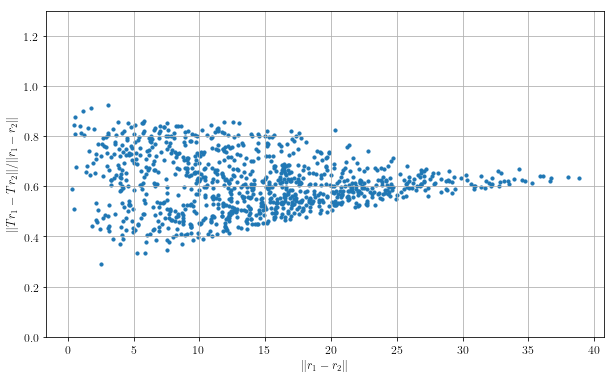

In [246]:
Tr, r_, dT, dr = sample_solutions(edges, inv_edges, solver = 'GUROBI', nsamples = 1000, seed=5, correct = True)

### Original graph without correction

ratio larger than 1
----------------------
     values of ri:  [5.618026809550363, -5.168637652528691, -0.44938915702167215] [1.5081982065135175, -2.8473061730121962, 1.3391079664986787]
     values of Tr:  [6.156136512615181, -5.256098501580379, -0.9000380110348019] [2.27913737631201, -2.1064755245841535, -0.17266185172785242]
     ratio:  1.0000457312119015
----------------------
     values of ri:  [-1.3460805588192954, 5.974323771997536, -4.628243213178241] [-0.05845054992270349, 7.197860341141951, -7.139409791219247]
     values of Tr:  [0.5962036600883585, 4.471082055830865, -5.067285715919225] [0.9718115773572824, 6.600388847909295, -7.572200425266583]
     ratio:  1.0757995324240834


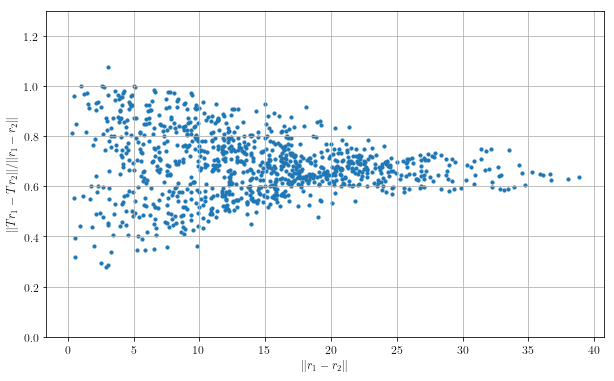

In [122]:
Tr, r_, dT, dr = sample_solutions(edges, inv_edges, nsamples = 1000, seed=5, name = 'contractivity_1', save = True)

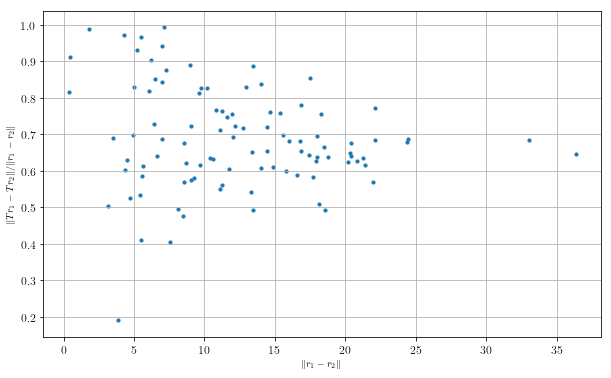

In [60]:
Tr, r_, dT, dr = sample_solutions(edges, inv_edges, nsamples = 100, seed=0)

## Run complete algorithm

You can also run the complete algorithm for a given number of iterations. 

In [103]:
r_tot = run_algorithm(edges, inv_edges, nsolutions = 10, seed =0, max_iter = 100)

The below functions plots the following:
- One graph for the evolution of each component of r (3 graphs)
- One graph for the evolution of each component in the last 5 iterations (3 graphs)
- One graph for the evolution of the difference of the norm between two iterations (1 graph)

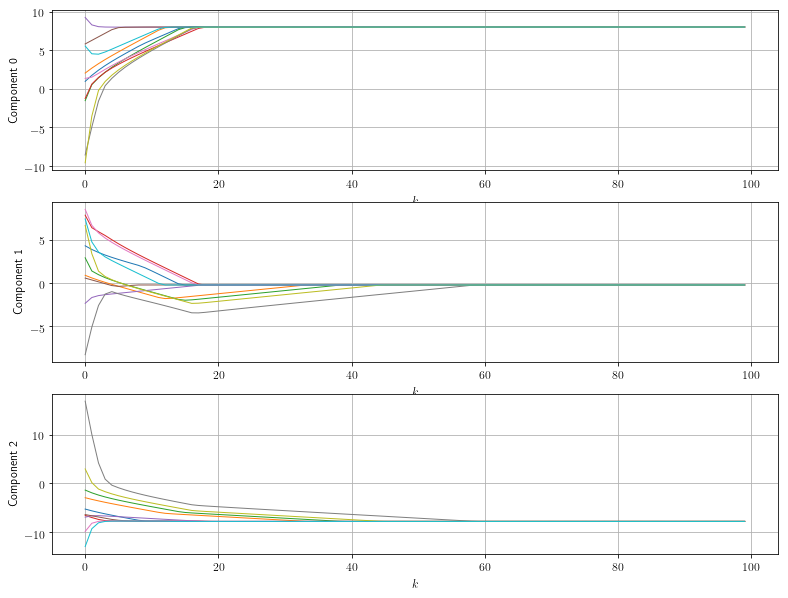

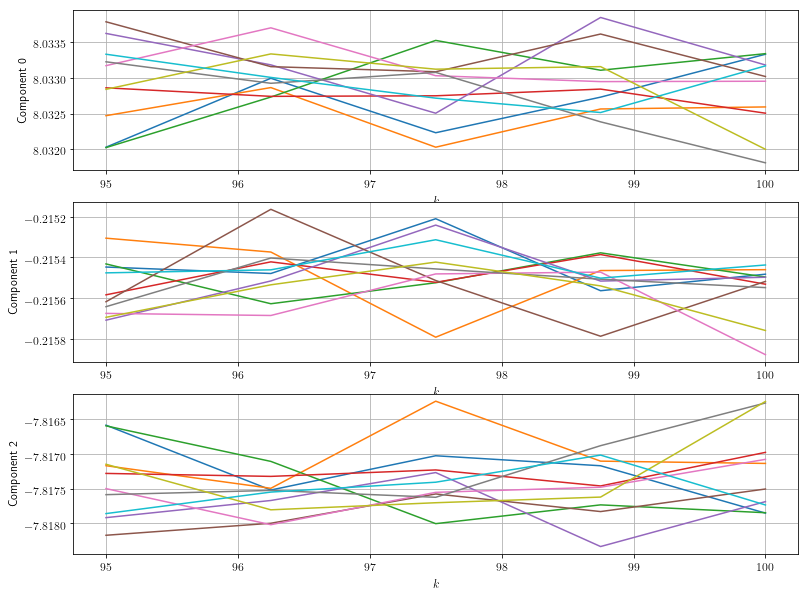

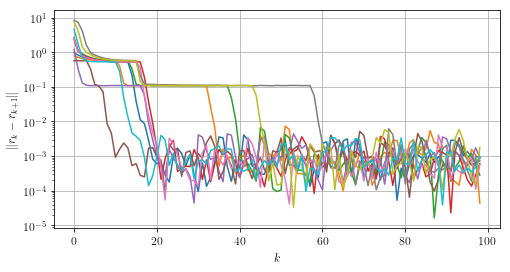

In [104]:
plot_results_run(r_tot)

In [113]:
#sanity check to see if the sum of r is always zero
for r in r_tot:
    r_arr = np.array(r)
    print(np.max(np.abs(r_arr.sum(axis = 1))))

6.217248937900877e-15
5.329070518200751e-15
5.329070518200751e-15
7.105427357601002e-15
5.329070518200751e-15
4.440892098500626e-15
5.329070518200751e-15
5.329070518200751e-15
5.329070518200751e-15
5.329070518200751e-15


# Studying the case that seems non-expansive

In [69]:
#The array that Dario sent over
# r_tot=np.array([[9.27325521, -2.33116962, -6.94208559],[
# 12.15707398, -3.15198501, -9.00508896],[
# 14.1393621 , -5.13365649, -9.00570561],[
# 16.04088505, -7.03611138, -9.00477367],[
# 17.93431272, -8.92816954, -9.00614317],[
# 18.35054864, -9.34473273, -9.00581591],[
# 18.34938286, -9.34439709, -9.00498577],[
# 18.35005116, -9.34429665, -9.00575451],[
# 18.35094391, -9.34497125, -9.00597265],[
# 18.35103773, -9.34489284, -9.00614489],[
# 18.34079332, -9.34249608, -8.99829724],[
# 18.35113586, -9.34492666, -9.0062092],[
# 18.34932621, -9.34435146, -9.00497475],[
# 18.35057853, -9.34490312, -9.00567541],[
# 18.35098092, -9.34475272, -9.0062282]])

In this case, only the first three OD pairs are used for to obtain this vector. 

In [70]:
inv_edges_bis = inv_edges.loc[0:2].copy()

In [81]:
"""
Returns
-------
f_p: cvxpy.Variable
    The flow for each commodity on each edge
f_r: cvxpy.Variable
    The rebalancing flow on each edge
r: cvxpy.Parameter
    The rebalancing guess for each node
d_var: cvxpy.Variable
    The demand for each each
prob: cvxpy.Problem
    The optimization problem
map_comps: dict
    A map linking components of f_p to the edges and inv edges
map_edges: dict
    A map linking edges to components of f_p
costs_dict: dict
    Dict containing the cost for each edge
inv_demand_dict: dict
    The inverse demand cost for each od pair
G: nx.DiGraph
    Graph representing the network
nodes: list
    list of nodes
"""
f_p, f_r, r, d_var, prob, map_comps, map_edges,\
 costs_dict, inv_d_dict, G, nodes = _construct_problem(edges, inv_edges_bis, correct = correct)

In [71]:
r0 = [np.array([ 9.27325521, -2.33116962, -6.94208559])]

In [72]:
r_tot = run_algorithm(edges, inv_edges_bis, nsolutions = 1, seed =0, max_iter = 15, r0 = r0)

In [73]:
diff = []
for r in r_tot:
    for i in range(len(r)-1):
        diff.append(np.linalg.norm(
        r[i]-r[i+1]))

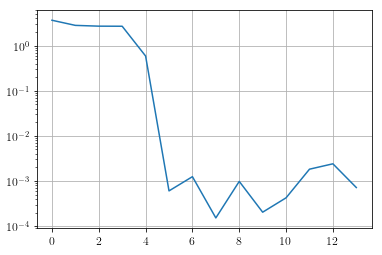

In [75]:
plt.plot(diff)
plt.yscale('log')
plt.grid()

In [85]:
rat_ = [diff[i+1]/diff[i] for i in range(len(diff)-1)]

In [90]:
rat_

[0.7696331647597754,
 0.9607478102571144,
 0.9955936107914595,
 0.2190346285294896,
 0.001028357718823531,
 2.0651581498306615,
 0.12197532502493207,
 6.442205968044475,
 0.2079015284844014,
 2.081448594454622,
 4.307518850835011,
 1.3159844178823599,
 0.2981544754375097]

We see that we recover the "flattening" at the beginning of the iterations. 

We want to understand what is happening here. 

We will focus on the first 4 iterates.

In [77]:
r_tot[0][:5]

[array([ 9.27325521, -2.33116962, -6.94208559]),
 array([12.1570736 , -3.15198499, -9.00508861]),
 array([14.1377665 , -5.13264233, -9.00512417]),
 array([16.0412405 , -7.03502643, -9.00621406]),
 array([17.93578471, -8.92957071, -9.006214  ])]

In [78]:
r_test = r_tot[0][:5]

In [18]:
solver = cp.GUROBI
# solver = cp.ECOS

In [83]:
r_new = []
for r_ in r_test:
    r.value = r_
    prob.solve(solver = solver, verbose = False)
    r_new.append(np.array(get_new_r(f_p, map_edges, nodes)))
    print("-------------------------------------")
    print("Analyzing the results for current r")
    print("COMPUTING KKT ERROR")
#     print("O D PATH_COST INV_DEMAND_COST")
    kkt_rel_error = compute_error_KKT(G, costs_dict, inv_d_dict, inv_edges_bis, map_comps, f_p)
#     print("COMPUTING KKT ERROR")
    print("ratios of used paths to inv_d_cost")
    for k in kkt_rel_error:
        print(k, kkt_rel_error[k])
#     print("TOTAL DEMAND")
#     print(get_d_values(inv_edges, d_var))

-------------------------------------
Analyzing the results for current r
COMPUTING KKT ERROR
ratios of used paths to inv_d_cost
(1, 2) [0.9997477578074246, 0.9994030762094354]
(2, 1) [0.9983815509018839, 0.9984931541528334]
(3, 1) [0.9987644080619569, nan]
-------------------------------------
Analyzing the results for current r
COMPUTING KKT ERROR
ratios of used paths to inv_d_cost
(1, 2) [0.9999937481755599, nan]
(2, 1) [0.9980789929159354, 0.9982179138734588]
(3, 1) [0.9987430654000387, nan]
-------------------------------------
Analyzing the results for current r
COMPUTING KKT ERROR
ratios of used paths to inv_d_cost
(1, 2) [0.9996446449719668, nan]
(2, 1) [0.9995618811241445, 0.999581593360962]
(3, 1) [0.9999548061008189, nan]
-------------------------------------
Analyzing the results for current r
COMPUTING KKT ERROR
ratios of used paths to inv_d_cost
(1, 2) [0.9999995824071329, nan]
(2, 1) [1.0000217562315163, 1.0000279475851033]
(3, 1) [1.0000149297643826, nan]
--------------

# What if it is a question of "too steep" cost functions? 

In [125]:
edges_ = pd.read_excel('cost_edges_3_flatter.xlsx')
inv_edges_ = pd.read_excel('inv_demand_3_flatter.xlsx')

## Viz costs

Visualize the costs for each OD pair specified in the Excels. 

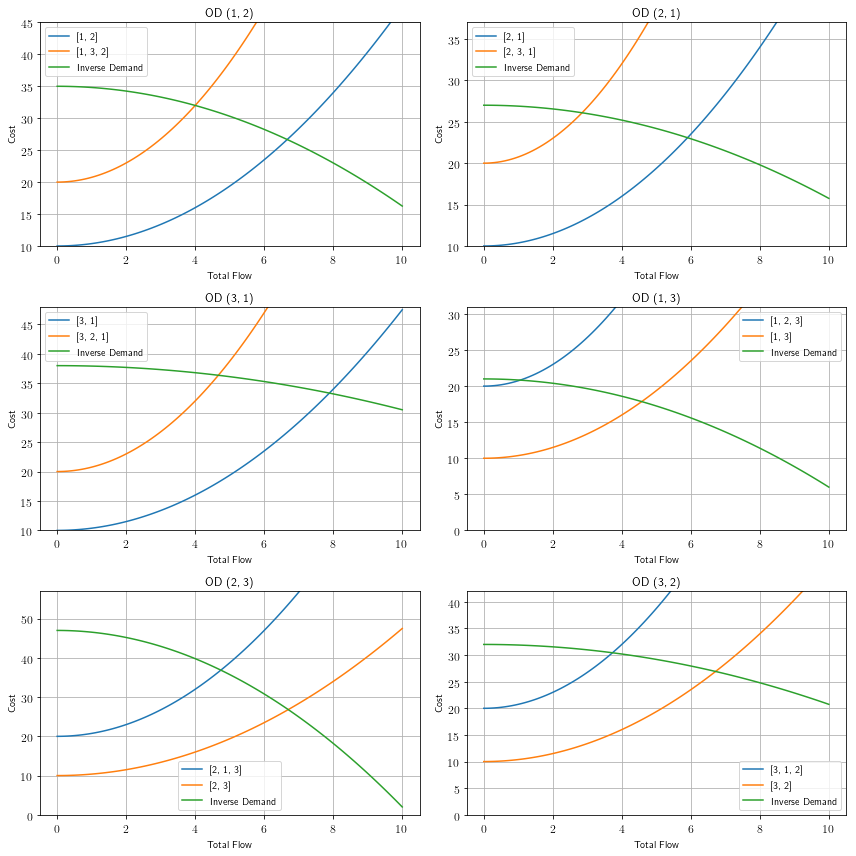

In [126]:
viz_costs(edges_, inv_edges_, name = 'costs1', save = False, correct = False, beta = 2)

## Solving just one instance to check if it works properly

The below builds the optimization problem. 

In [130]:
"""
Returns
-------
f_p: cvxpy.Variable
    The flow for each commodity on each edge
f_r: cvxpy.Variable
    The rebalancing flow on each edge
r: cvxpy.Parameter
    The rebalancing guess for each node
d_var: cvxpy.Variable
    The demand for each each
prob: cvxpy.Problem
    The optimization problem
map_comps: dict
    A map linking components of f_p to the edges and inv edges
map_edges: dict
    A map linking edges to components of f_p
costs_dict: dict
    Dict containing the cost for each edge
inv_demand_dict: dict
    The inverse demand cost for each od pair
G: nx.DiGraph
    Graph representing the network
nodes: list
    list of nodes
"""
f_p, f_r, r, d_var, prob, map_comps, map_edges,\
 costs_dict, inv_d_dict, G, nodes = _construct_problem(edges_, inv_edges_, beta = 2)

Specify a value of the rebalancing parameter

In [131]:
r_new = [0, 0, 0]
r.value = r_new

You can then solve the problem. 

In [132]:
prob.solve(solver = cp.GUROBI)

-622.5664246704896

Check the status. 

In [133]:
prob.status

'optimal'

Therefore, the below function helps in analyzing and decomposing edge by edge for the passenger flow. 

In [134]:
get_edge_flow(f_p, map_edges)

{(1, 2): 6.666343996677822,
 (1, 3): 4.577735134067535,
 (2, 1): 5.904924894586603,
 (2, 3): 6.696930333457569,
 (3, 1): 7.888076787727736,
 (3, 2): 6.718533304652917}

In [135]:
get_d_values(inv_edges, d_var)

{(1, 2): 6.666343994879934,
 (2, 1): 5.904924878166306,
 (3, 1): 7.888076785441562,
 (1, 3): 4.577735114353537,
 (2, 3): 6.696930331540059,
 (3, 2): 6.7185332879213915}

In [138]:
flows = get_flow_edge_od(map_comps, f_p)

We can break down the assignment OD pair per OD pair, for each edge. 

In [139]:
o = 1
d = 3

for p in nx.all_simple_paths(G, o, d):
    print(p)
    cost_path = 0 
    for i in range(len(p)-1):
        print("  Edge: ",p[i], p[i+1])
        ce = costs_dict[(p[i], p[i+1])].value
        cost_path += ce
        print('     Cost:', ce)
        print('     Flow:', flows[(p[i],p[i+1])][(o, d)])
    print('Path cost: ', cost_path)
    print("Inv Demand: ", inv_d_dict[(o, d)].value)

[1, 2, 3]
  Edge:  1 2
     Cost: 26.66505337376625
     Flow: 2.8111578587953876e-09
  Edge:  2 3
     Cost: 26.818328477498127
     Flow: 2.8111578587953876e-09
Path cost:  53.483381851264376
Inv Demand:  17.85665118342219
[1, 3]
  Edge:  1 3
     Cost: 17.85837212662832
     Flow: 4.577735111542379
Path cost:  17.85837212662832
Inv Demand:  17.85665118342219


You can compute the relative error in solving the KKT conditions. For each used path, returns a number that should be exactly 1 if the problem is solved exactly. Returns NAN if path is not used. 

In [140]:
kkt_rel_error = compute_error_KKT(G, costs_dict, inv_d_dict, inv_edges, map_comps, f_p)

In [141]:
kkt_rel_error

{(1, 2): [0.9999092545133295, nan],
 (2, 1): [0.9999227501847942, nan],
 (3, 1): [0.9999936986193205, nan],
 (1, 3): [nan, 1.0000963754731194],
 (2, 3): [nan, 1.0000120298643889],
 (3, 2): [nan, 1.0001898551358406]}

We can also compute directly the new rebalancing guess. 

In [142]:
get_new_r(f_p, map_edges, nodes)

[2.548922551568981, 0.7830220732865669, -3.3319446248555495]

## Sample solutions

ratio larger than 1
----------------------
     values of ri:  [-5.087380029116786, -8.574680318100645, 13.66206034721743] [-3.0454166466573485, -9.743038520391929, 12.788455167049278]
     values of Tr:  [-1.9214731071710132, -5.935434306033513, 7.8569074132045245] [-0.07060643080852917, -5.93561290021371, 6.006219331022234]
     ratio:  1.0429719639558113
----------------------
     values of ri:  [-3.0454166466573485, -9.743038520391929, 12.788455167049278] [-6.68716346723407, -8.792671351644445, 15.479834818878516]
     values of Tr:  [-0.07060643080852917, -5.93561290021371, 6.006219331022234] [-3.4274873140949746, -5.93509066002757, 9.362577974122544]
     ratio:  1.0259318934505892
----------------------
     values of ri:  [-3.5191400968532083, -7.8003935413507675, 11.319533638203975] [-1.7928908375181862, -8.905249749115749, 10.698140586633935]
     values of Tr:  [-0.493429456848786, -5.934841169283148, 6.428270626131933] [1.0269506280941274, -5.935622379390391, 4.90867175129

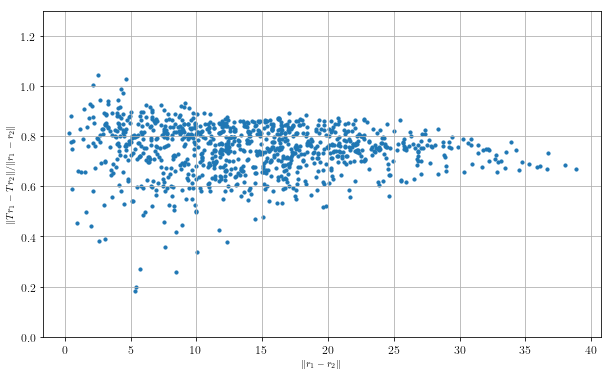

In [146]:
Tr, r_, dT, dr = sample_solutions(edges_, inv_edges_, solver = 'GUROBI', nsamples = 1000, seed=5, beta = 2)

## Studying a case with rat >1 

In [147]:
r1 = [-5.087380029116786, -8.574680318100645, 13.66206034721743]

r2 = [-3.0454166466573485, -9.743038520391929, 12.788455167049278]

In [148]:
r_test = [np.array(r1), np.array(r2)]

In [149]:
solver = cp.GUROBI
# solver = cp.ECOS

In [150]:
r_new = []
for r_ in r_test:
    r.value = r_
    prob.solve(solver = solver, verbose = False)
    r_new.append(np.array(get_new_r(f_p, map_edges, nodes)))
    print("-------------------------------------")
    print("Analyzing the results for current r")
    print("COMPUTING KKT ERROR")
#     print("O D PATH_COST INV_DEMAND_COST")
    kkt_rel_error = compute_error_KKT(G, costs_dict, inv_d_dict, inv_edges_, map_comps, f_p)
#     print("COMPUTING KKT ERROR")
    print("ratios of used paths to inv_d_cost")
    for k in kkt_rel_error:
        print(k, kkt_rel_error[k])
#     print("TOTAL DEMAND")
#     print(get_d_values(inv_edges, d_var))

-------------------------------------
Analyzing the results for current r
COMPUTING KKT ERROR
ratios of used paths to inv_d_cost
(1, 2) [0.999996620115435, nan]
(2, 1) [0.999992608370683, nan]
(3, 1) [0.9999935296183757, nan]
(1, 3) [nan, 0.9999980741489873]
(2, 3) [nan, 0.9999929634072879]
(3, 2) [nan, nan]
-------------------------------------
Analyzing the results for current r
COMPUTING KKT ERROR
ratios of used paths to inv_d_cost
(1, 2) [1.000019312436656, nan]
(2, 1) [1.0000542833580972, nan]
(3, 1) [1.0000020318760283, nan]
(1, 3) [nan, 1.000037214246423]
(2, 3) [nan, 0.9999979611775557]
(3, 2) [nan, nan]


In [151]:
rat = np.linalg.norm(r_new[0]-r_new[1]) / np.linalg.norm(r_test[0]-r_test[1])

In [152]:
rat

1.0429719639558113